In [86]:
class LR:
  def __inti__(self):
    self.m = None
    self.b = None
  def fit(self,X_train,y_train):
    num = 0
    den = 0
    for i in range(X_train.shape[0]):
      num = num + (X_train[i]-X_train.mean())*(y_train[i]-y_train.mean())
      den = den + (X_train[i]-X_train.mean())*(X_train[i]-X_train.mean())
    self.m = num/den
    self.b = y_train.mean() - (self.m * X_train.mean())
    print(self.m)
    print(self.b)


  def predict(self,X_test):
    return self.m * X_test + self.b
    

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [112]:
from sklearn.datasets import load_diabetes
X,y = load_diabetes(return_X_y=True)

In [114]:
X = X[:, np.newaxis, 2]

# Split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]

# Split the targets into training/testing sets
y_train = y[:-20]
y_test = y[-20:]


In [115]:
X_train.shape

(422, 1)

In [116]:
from sklearn.linear_model import LinearRegression
lr_sk = LinearRegression()

In [117]:
lr_sk.fit(X_train,y_train)

LinearRegression()

In [118]:
print(f"{lr_sk.coef_} {lr_sk.intercept_}")

[938.23786125] 152.91886182616167


In [127]:
y_pred_sk = lr_sk.predict(X_test)
print(y_pred_sk)

[225.9732401  115.74763374 163.27610621 114.73638965 120.80385422
 158.21988574 236.08568105 121.81509832  99.56772822 123.83758651
 204.73711411  96.53399594 154.17490936 130.91629517  83.3878227
 171.36605897 137.99500384 137.99500384 189.56845268  84.3990668 ]


In [128]:
lr = LR()
lr.fit(X_train,y_train)

[938.23786125]
[152.91886183]


In [129]:
y_pred = lr.predict(X_test)
print(y_pred)

[[225.9732401 ]
 [115.74763374]
 [163.27610621]
 [114.73638965]
 [120.80385422]
 [158.21988574]
 [236.08568105]
 [121.81509832]
 [ 99.56772822]
 [123.83758651]
 [204.73711411]
 [ 96.53399594]
 [154.17490936]
 [130.91629517]
 [ 83.3878227 ]
 [171.36605897]
 [137.99500384]
 [137.99500384]
 [189.56845268]
 [ 84.3990668 ]]


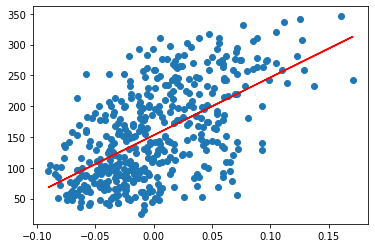

In [130]:
plt.scatter(X,y)
plt.plot(X_train,lr_sk.predict(X_train),color='red')

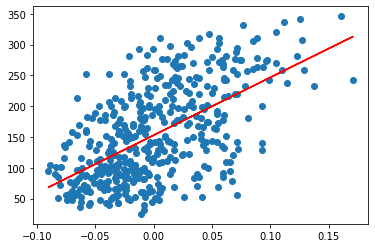

In [133]:
plt.scatter(X,y)
plt.plot(X_train,lr.predict(X_train),color='red')

In [135]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print(f"MAE {mean_absolute_error(y_test,y_pred)}")
print(f"MSE {mean_squared_error(y_test,y_pred)}")

print(f"R2 {r2_score(y_test,y_pred)}")

MAE 41.22709128976144
MSE 2548.0723987259694
R2 0.47257544798227147


In [137]:
X_test.shape

(20, 1)

In [139]:
#adjusted r2 score
r2 = r2_score(y_test,y_pred)

adj_r2 = 1-((1-r2)*(20-1)/(20-1-1))
print(adj_r2)

0.44327408398128654
